                                AAPL        WMT       TSLA       AMZN  \
Date                                                                    
2010-01-04 00:00:00-05:00   6.454506  13.113419        NaN   6.695000   
2010-01-05 00:00:00-05:00   6.465664  12.982840        NaN   6.734500   
2010-01-06 00:00:00-05:00   6.362819  12.953824        NaN   6.612500   
2010-01-07 00:00:00-05:00   6.351056  12.961074        NaN   6.500000   
2010-01-08 00:00:00-05:00   6.393281  12.895783        NaN   6.676000   
...                              ...        ...        ...        ...   
2016-12-23 00:00:00-05:00  27.007305  20.115482  14.222667  38.029499   
2016-12-27 00:00:00-05:00  27.178829  20.161772  14.635333  38.570000   
2016-12-28 00:00:00-05:00  27.062937  20.048948  14.649333  38.606499   
2016-12-29 00:00:00-05:00  27.055981  20.034485  14.312000  38.257500   
2016-12-30 00:00:00-05:00  26.845058  19.993994  14.246000  37.493500   

                                  DB          GE  

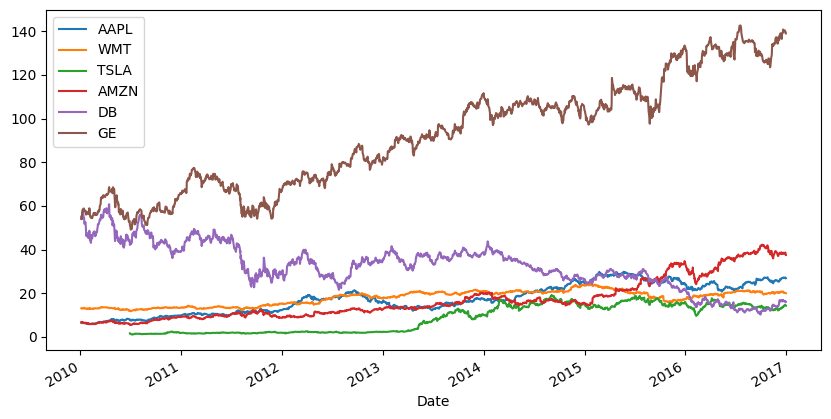

                               AAPL       WMT      TSLA      AMZN        DB  \
Date                                                                          
2010-01-05 00:00:00-05:00  0.001727 -0.010008       NaN  0.005883  0.018937   
2010-01-06 00:00:00-05:00 -0.016034 -0.002237       NaN -0.018282 -0.017436   
2010-01-07 00:00:00-05:00 -0.001850  0.000560       NaN -0.017160  0.011254   
2010-01-08 00:00:00-05:00  0.006627 -0.005050       NaN  0.026717  0.035496   
2010-01-11 00:00:00-05:00 -0.008861  0.016366       NaN -0.024335 -0.005611   
...                             ...       ...       ...       ...       ...   
2016-12-23 00:00:00-05:00  0.001976 -0.000719  0.023188 -0.007532  0.004843   
2016-12-27 00:00:00-05:00  0.006331  0.002299  0.028602  0.014113 -0.014054   
2016-12-28 00:00:00-05:00 -0.004273 -0.005612  0.000956  0.000946 -0.024802   
2016-12-29 00:00:00-05:00 -0.000257 -0.000722 -0.023296 -0.009081 -0.005596   
2016-12-30 00:00:00-05:00 -0.007826 -0.002023 -0.004

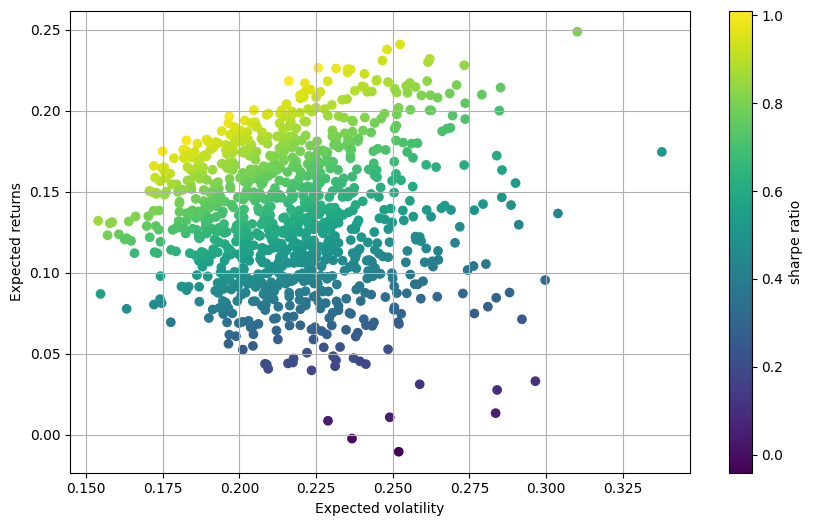

In [22]:
import pandas as pd 
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import scipy.optimize as optimization


stocks=['AAPL','WMT','TSLA','AMZN','DB','GE']
start_date='2010-01-01'
end_date='2017-01-01'
no_of_trading_days=252
no_of_portfolio=1000

def download_data():
    stock_data={}
    for stock in stocks:
        ticker=yf.Ticker(stock)
        stock_data[stock]=ticker.history(start=start_date,end=end_date)['Close']

    return pd.DataFrame(stock_data)

def show_data(d):
    d.plot(figsize=(10,5))
    plt.show()

def calculate_returns(d):
    log_returns=np.log(d/d.shift(1))
    return log_returns[1:]

def show_statistics(returns):
    print(returns.mean()*no_of_trading_days)
    print(returns.cov()*no_of_trading_days)

def show_mean_variance(returns,weight):
    portfolio_return=np.sum(returns.mean() * weights) * no_of_trading_days
    portfolio_volatility=np.sqrt(np.dot(weights.T,np.dot(returns.cov()*no_of_trading_days,weights)))
    print('Expected portfolio mean (return):',portfolio_return)
    print('Expected portfolio volatility (standard deviation):',portfolio_volatility)

def generate_portfolios(returns):
    portfolio_means=[]
    portfolio_risk=[]
    portfolio_weights=[]
    for _ in range(no_of_portfolio):
        w=np.random.random(len(stocks))
        w/=np.sum(w)
        portfolio_weights.append(w)
        portfolio_means.append(np.sum(returns.mean()*w)*no_of_trading_days)
        portfolio_risk.append(np.sqrt(np.dot(w.T,np.dot(returns.cov()*no_of_trading_days,w))))
    return np.array(portfolio_means),np.array(portfolio_risk),np.array(portfolio_weights)

def show_portfolios(returns,volatility):
    plt.figure(figsize=(10,6))
    plt.scatter(volatility,returns,c=returns/volatility,marker='o')
    plt.grid(True)
    plt.xlabel('Expected volatility')
    plt.ylabel('Expected returns')
    plt.colorbar(label='sharpe ratio')
    plt.show()

if __name__=='__main__':
    data=download_data()
    print(data)
    show_data(data)
    print(calculate_returns(data))
    show_statistics(calculate_returns(data))
    mean,risk,weights=generate_portfolios(calculate_returns(data))
    show_portfolios(mean,risk)